<a href="https://colab.research.google.com/github/mahin-arvind/Topic-Modeling-on-News-Articles/blob/main/Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os, glob

In [32]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [127]:
from collections import defaultdict
from pathlib import Path
import string, re
from nltk import sent_tokenize


In [270]:
'''
extracting news articles from folders in the dataset using their path and
storing them into a dataframe named after their topic
'''

#Folder paths of news articles
f1 = '/content/drive/MyDrive/Datasets/Unsupervised/Topic Modeling/Topic Modeling on BBC News Articles/bbc/business'
f2 = '/content/drive/MyDrive/Datasets/Unsupervised/Topic Modeling/Topic Modeling on BBC News Articles/bbc/entertainment'
f3 = '/content/drive/MyDrive/Datasets/Unsupervised/Topic Modeling/Topic Modeling on BBC News Articles/bbc/politics'
f4 = '/content/drive/MyDrive/Datasets/Unsupervised/Topic Modeling/Topic Modeling on BBC News Articles/bbc/sport'
f5 = '/content/drive/MyDrive/Datasets/Unsupervised/Topic Modeling/Topic Modeling on BBC News Articles/bbc/tech'

#topic dictionaries to store headline and content of the articles
business = defaultdict(list)
entertainment = defaultdict(list)
politics = defaultdict(list)
tech = defaultdict(list)
sport = defaultdict(list)

#iterating through the topics and folderpaths to update articles into dictionaries
for folder, results in [(f1,business),(f2,entertainment),(f3,politics),(f4,sport),(f5,tech)]:
  for file in Path(folder).iterdir():
    file = open(file,'rt')
    if file.name != '/content/drive/MyDrive/Datasets/Unsupervised/Topic Modeling/Topic Modeling on BBC News Articles/bbc/sport/199.txt': # as this file has a euro sign, it is not able to be decoded
      text = file.read()
      sentences = sent_tokenize(text)
      if '\n\n' in sentences[0]:
        headline = sentences[0].split('\n\n')[0] # extracts headline using '\n\n'
        sentences[0] = sentences[0].split('\n\n')[1] #removing headline from content
      else:
        headline = sentences[0]
        sentences= sentences[1:]
        
      results['Headline'].append(headline)
      results['Content'].append( ' '.join(sentences))
      file.close()



In [271]:
#converting dictionaries into dataframes
business = pd.DataFrame(business)
entertainment = pd.DataFrame(entertainment)
politics = pd.DataFrame(politics)
tech = pd.DataFrame(tech)
sport = pd.DataFrame(sport)

In [239]:
business

,Headline,Content
0,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...
1,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...
2,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...
3,US trade gap hits record in 2004,The gap between US exports and imports hit an ...
4,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...
...,...,...
505,China now top trader with Japan,China overtook the US to become Japan's bigges...
506,UK economy ends year with spurt,The UK economy grew by an estimated 3.1% in 20...
507,Euro firms miss out on optimism,More than 90% of large companies around the wo...
508,Aids and climate top Davos agenda,Climate change and the fight against Aids are ...


In [244]:
entertainment

,Headline,Content
0,Gallery unveils interactive tree,A Christmas tree that can receive text message...
1,Arthur Hailey: King of the bestsellers,"Novelist Arthur Hailey, who has died at the ag..."
2,Hundreds vie for best film Oscar,A total of 267 films are eligible for the best...
3,Neeson in bid to revive theatre,Hollywood film star Liam Neeson has held a din...
4,Vera Drake scoops film award,Oscar hopefuls Mike Leigh and Imelda Staunton ...
...,...,...
381,Original Exorcist to be screened,The original version of horror prequel Exorcis...
382,US 'afflicted' with awards fatigue,The film world and media may be wild about the...
383,Boogeyman takes box office lead,The low-budget horror film Boogeyman has knock...
384,Hitch holds on to US box office,"Will Smith's first romantic comedy, Hitch, has..."


In [245]:
politics

,Headline,Content
0,Fox attacks Blair's Tory 'lies',Tony Blair lied when he took the UK to war so ...
1,Labour chooses Manchester,The Labour Party will hold its 2006 autumn con...
2,Hewitt decries 'career sexism',Plans to extend paid maternity leave beyond si...
3,Watchdog probes e-mail deletions,The information commissioner says he is urgent...
4,Mrs Howard gets key election role,"Michael Howard's ex-model wife, Sandra, is to ..."
...,...,...
412,Tories urge 'change at the top',Tory delegates are gathering for what is expec...
413,Sayeed to stand down as Tory MP,Tory MP Jonathan Sayeed is to stand down on th...
414,Labour MP praises Tory campaign,"The Conservatives have been ""a lot smarter"" in..."
415,'Last chance' warning for voters,"People in England, Scotland and Wales must hav..."


In [246]:
tech

,Headline,Content
0,Microsoft seeking spyware trojan,Microsoft is investigating a trojan program th...
1,Technology gets the creative bug,The hi-tech and the arts worlds have for some ...
2,Ink helps drive democracy in Asia,"The Kyrgyz Republic, a small, mountainous stat..."
3,China net cafe culture crackdown,"Chinese authorities closed 12,575 net cafes in..."
4,Digital guru floats sub-$100 PC,"Nicholas Negroponte, chairman and founder of M..."
...,...,...
396,BT program to beat dialler scams,BT is introducing two initiatives to help beat...
397,Bad e-mail habits sustains spam,The 'bad behaviour' of e-mail users is helping...
398,Microsoft plans 'safer ID' system,Microsoft is planning to make Windows and Inte...
399,Camera phones are 'must-haves',Four times more mobiles with cameras in them w...


In [272]:
sport

,Headline,Content
0,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world rec...
1,2004: An Irish Athletics Year,2004 won't be remembered as one of Irish athle...
2,Off-colour Gardener storms to win,Britain's Jason Gardener shook off an upset st...
3,Kenya lift Chepkemei's suspension,Kenya's athletics body has reversed a ban on m...
4,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of lo...
...,...,...
505,Slovakia reach Hopman Cup final,Slovakia will play Argentina in the final of t...
506,Officials respond in court row,Australian tennis' top official has defended t...
507,Hewitt fights back to reach final,Lleyton Hewitt kept his dream of an Australian...
508,Philippoussis doubt over Open bid,Mark Philippoussis is almost certain to miss t...


#creating shuffled aggregate dataset

In [275]:
frames = [politics,sport,tech,entertainment,business]
df = pd.concat(frames).sample(frac=1) #shuffled aggregate dataset

### First we develop a list of the top words used across all one million headlines, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [278]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

###Plotting Top words in Headlines

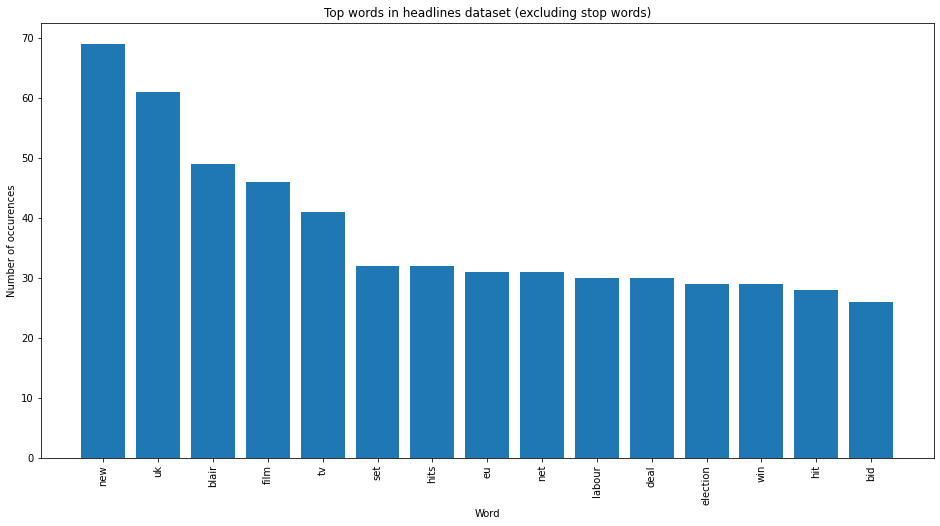

In [281]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data= df['Headline'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

###Plotting Top words in news article content

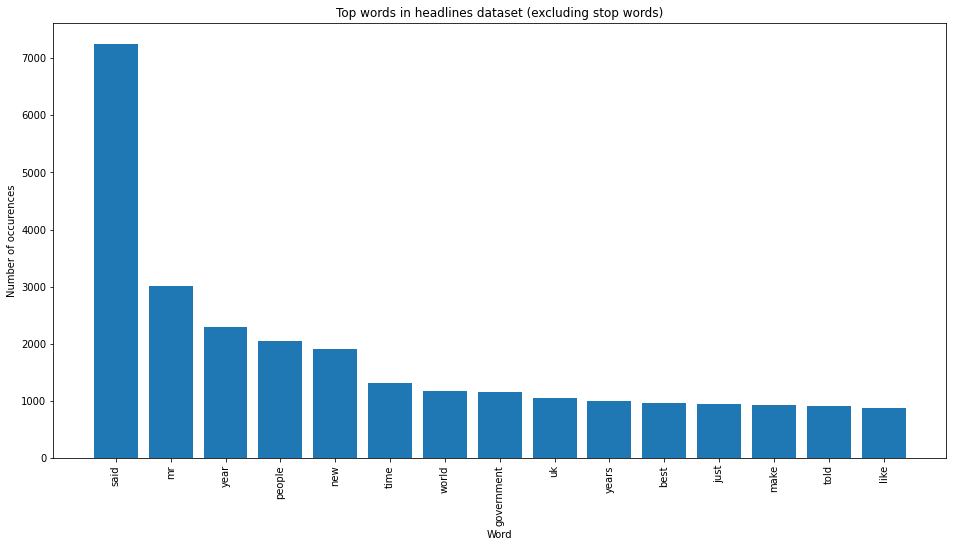

In [282]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data= df['Content'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

###Preprocessing

In [286]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
small_text_sample = df['Headline'].values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: Feta cheese battle reaches court
Headline after vectorization: 
  (0, 326)	1
  (0, 791)	1
  (0, 1264)	1
  (0, 624)	1
  (0, 2588)	1


In [287]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -23956.4956074631
LDA model Perplexity on train data 5225.09700947789


In [288]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 24.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d30aefe826ab0602d578299532ed15899e7cb58f645b8558e31ec7d2da04dcf4
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [289]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [290]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  21.469643
3       51.163364 -159.968018       2        1  20.913072
2      -73.144554   21.523815       3        1  19.683534
1      -66.410133 -110.606438       4        1  19.473074
4       54.417324   12.443444       5        1  18.460677, topic_info=        Term       Freq      Total Category  logprob  loglift
384    blair  36.000000  36.000000  Default  30.0000  30.0000
1997     man  17.000000  17.000000  Default  29.0000  29.0000
2757     row  17.000000  17.000000  Default  28.0000  28.0000
2686  return  17.000000  17.000000  Default  27.0000  27.0000
2194     new  50.000000  50.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
2890     set   5.486407  23.867350   Topic5  -5.7705   0.2193
1155      eu   5.166801  23.173710   Topic5  -5.8305   0.1888
3585   world   4.645650  15.204055   Topic5  -5.9368   0.5039
1837  labour   5.024572  22.505681   Topic5  -5.8584   0.1901
1590     hit   4.809844  20.923343   Topic5  -5.9021   0.2193

[336 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5         4  0.922023    100m
23        5  0.927933      19
109       2  0.346742  action
109       5  0.693484  action
151       4  0.691679  aiming
...     ...       ...     ...
3612      4  0.691679    york
3617      1  0.327900   yukos
3617      2  0.196740   yukos
3617      3  0.196740   yukos
3617      4  0.327900   yukos

[535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

#Preprocessing Content

In [291]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
small_text_sample = df['Content'].values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: A row over whether only Greece should be allowed to label its cheese feta has reached the European Court of Justice. The Danish and German governments are challenging a European Commission ruling which said Greece should have sole rights to use the name. The Commission's decision gave the same legal protection to feta as to Italian Parma ham and French Champagne. But critics of the judgement say feta is a generic term, with the cheese produced widely outside Greece. The Commission's controversial 2002 ruling gave "protected designation of origin" status to feta cheese made in Greece, effectively restricting the use of the feta name to producers there. From 2007 onwards, Greek firms will have the exclusive use of the feta label and producers elsewhere in Europe must find another name to describe their products. The German and Danish governments argue that feta does not relate to a specific geographical area and that their firms have been producing and expo

In [292]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -717754.6209124234
LDA model Perplexity on train data 2882.62430398052


In [293]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  24.190052
0       51.163364 -159.968018       2        1  21.463732
3      -73.144554   21.523815       3        1  19.420972
4      -66.410133 -110.606438       4        1  17.920950
1       54.417324   12.443444       5        1  17.004294, topic_info=            Term         Freq        Total Category  logprob  loglift
5941          mr  2957.000000  2957.000000  Default  30.0000  30.0000
3587        film   815.000000   815.000000  Default  29.0000  29.0000
4058  government  1140.000000  1140.000000  Default  28.0000  28.0000
1167        best   935.000000   935.000000  Default  27.0000  27.0000
5179      labour   763.000000   763.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1081         bbc   195.430209   735.368476   Topic5  -5.8807   0.4465
5354        like   201.141967   858.228761   Topic5  -5.8519   0.3208
5435      london   170.483894   446.069279   Topic5  -6.0173   0.8099
9340          uk   181.862052  1031.066133   Topic5  -5.9527   0.0366
9317          tv   161.834377   472.426377   Topic5  -6.0694   0.7004

[377 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.270502      000
1         2  0.225844      000
1         3  0.367474      000
1         4  0.024243      000
1         5  0.111008      000
...     ...       ...      ...
9961      5  0.306310    years
9964      3  0.987363      yen
9979      4  0.978969  yugansk
9982      3  0.079668    yukos
9982      4  0.921874    yukos

[814 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])

the model has correctly clustered into sports, politics, business, tech and entertainment